# Part 2

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\04 Instacart Project'

In [3]:
df_orders_products = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products.pkl'))

In [4]:
df_user_stats_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'user_stats_customers_merged.pkl'))

## Lesson Examples

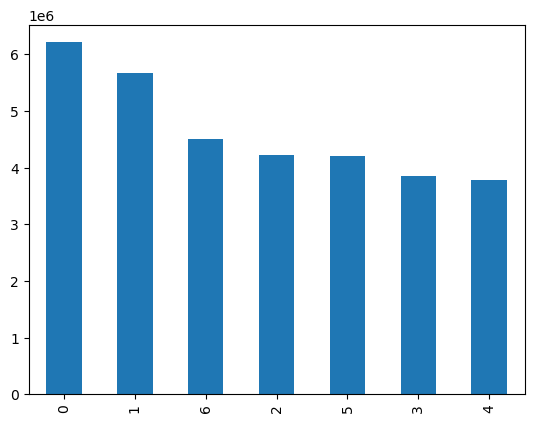

In [5]:
#2.
#Bar chart
bar = df_orders_products['orders_day_of_week'].value_counts().plot.bar()

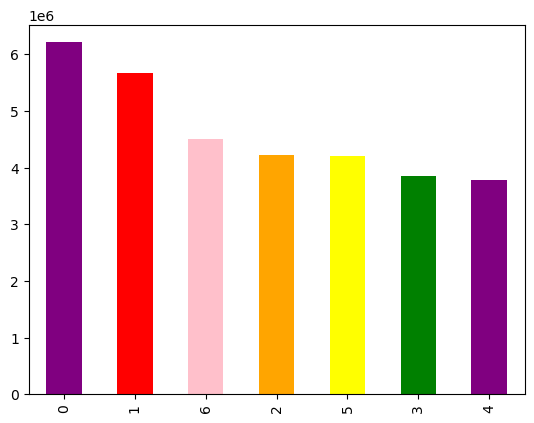

In [6]:
#Bar chart color
bar = df_orders_products['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green'])

In [7]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [8]:
#Histogram
#Only a singular column instead of the expected 25
df_orders_products['prices'].plot.hist(bins = 25)

<Axes: ylabel='Frequency'>

In [9]:
#A look into the prices column
df_orders_products['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

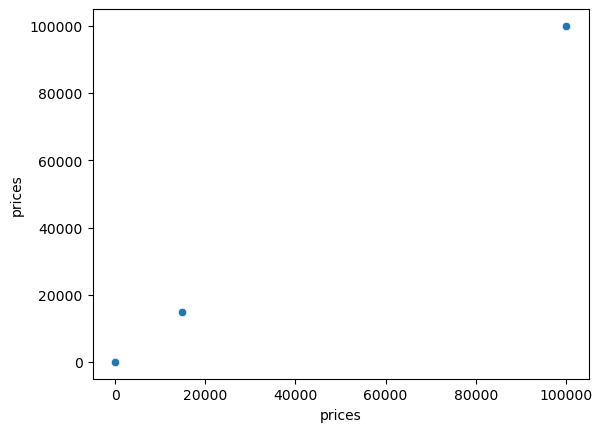

In [10]:
#Prices scatterplot to see data distribution
sns.scatterplot(x = 'prices', y = 'prices',data = df_orders_products)

In [11]:
#Seeing prices outliers 
df_orders_products.loc[df_orders_products['prices'] > 100]

order_id  user_id  order_number  orders_day_of_week  \
10030345    912404       17            12                   2   
10030346    603376       17            22                   6   
10030347   3264360      135             2                   2   
10030348    892534      135             3                   0   
10030349    229704      342             8                   1   
...            ...      ...           ...                 ...   
29193268   2249946   204099            29                   0   
29193269   2363282   204099            31                   0   
29193270   3181945   204395            13                   3   
29193271   2486215   205227             7                   3   
29193272   2232716   205227            10                   0   

          order_hour_of_day  days_since_prior_order  product_id  \
10030345                 14                     5.0       21553   
10030346                 16                     4.0       21553   
10030347                 21                    13.0       21553   
10030348                  8                    12.0       21553   
10030349                 19                    30.0       21553   
...                     ...                     ...         ...   
29193268                  8                     4.0       33664   
29193269                  9                     2.0       33664   
29193270                 15                     8.0       33664   
29193271                 20                     4.0       33664   
29193272                 11                     4.0       33664   

          add_to_cart_order  reordered                      product_name  \
10030345                  5          0  Lowfat 2% Milkfat Cottage Cheese   
10030346                  3          1  Lowfat 2% Milkfat Cottage Cheese   
10030347                  6          0  Lowfat 2% Milkfat Cottage Cheese   
10030348                  3          1  Lowfat 2% Milkfat Cottage Cheese   
10030349                  9          0  Lowfat 2% Milkfat Cottage Cheese   
...                     ...        ...                               ...   
29193268                  1          0             2 % Reduced Fat  Milk   
29193269                  1          1             2 % Reduced Fat  Milk   
29193270                 25          0             2 % Reduced Fat  Milk   
29193271                  8          0             2 % Reduced Fat  Milk   
29193272                 23          1             2 % Reduced Fat  Milk   

          aisle_id  department_id   prices     busiest_day  \
10030345       108             16  14900.0  Regularly busy   
10030346       108             16  14900.0  Regularly busy   
10030347       108             16  14900.0  Regularly busy   
10030348       108             16  14900.0     Busiest day   
10030349       108             16  14900.0  Regularly busy   
...            ...            ...      ...             ...   
29193268        84             16  99999.0     Busiest day   
29193269        84             16  99999.0     Busiest day   
29193270        84             16  99999.0  Regularly busy   
29193271        84             16  99999.0  Regularly busy   
29193272        84             16  99999.0     Busiest day   

                busiest_days busiest_period_of_day  max_order  \
10030345      Regularly busy           Most orders         40   
10030346      Regularly busy           Most orders         40   
10030347      Regularly busy        Average orders          4   
10030348        Busiest days        Average orders          4   
10030349        Busiest days        Average orders         16   
...                      ...                   ...        ...   
29193268        Busiest days        Average orders         39   
29193269        Busiest days           Most orders         39   
29193270  Least busiest days           Most orders         15   
29193271  Least busiest days        Average orders         12   
29193272        Busiest days           Most orders 

In [12]:
#Removing prices outliers by changing them to NaNs
df_orders_products.loc[df_orders_products['prices'] >100, 'prices'] = np.nan

In [13]:
#Checking prices max value
df_orders_products['prices'].max()

25.0

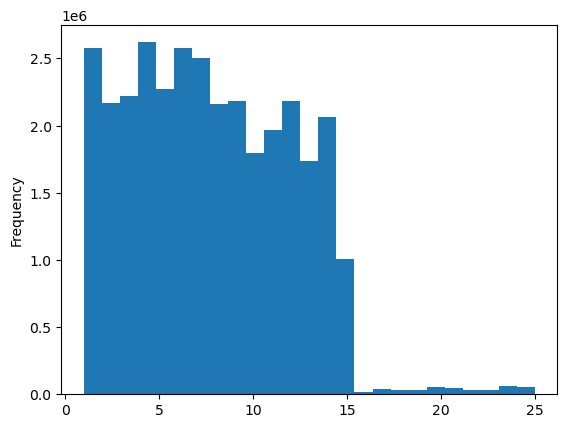

In [14]:
#Generating histogram
hist = df_orders_products['prices'].plot.hist(bins = 25)

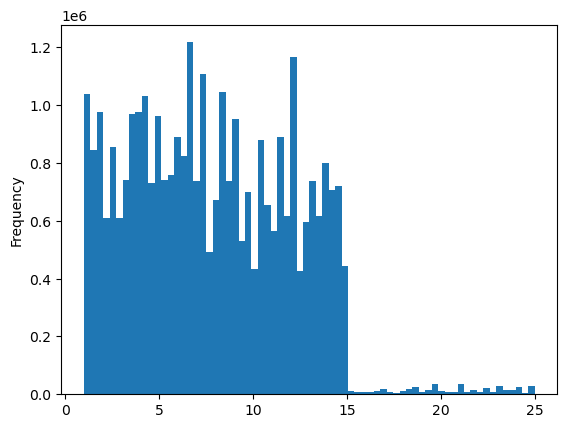

In [15]:
hist_2 = df_orders_products['prices'].plot.hist(bins = 70)

In [16]:
#Line Charts
#Creating subset 
df = df_orders_products[:2000000]

In [17]:
#Creating random values
#Create a list of holding True/False values to test the np.random.rant() <= 0.7
#Any rows whose assigned number is less than 0.7 are placed in one sample
np.random.seed(4)
dev = np.random.rand(len(df_orders_products)) <= 0.7

In [18]:
#Testing dev
dev

array([False,  True, False, ..., False,  True,  True])

In [19]:
big = df_orders_products[dev]

In [20]:
small = df_orders_products[~dev]

In [21]:
#Testing big and small dataframes
len(df_orders_products)

32434212

In [22]:
len(big) + len(small)

32434212

In [23]:
#Dataframe for only columns needed for line chart
df_2 = small[['orders_day_of_week','prices']]

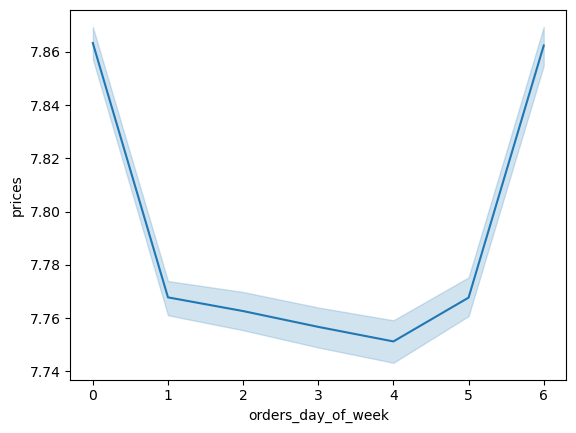

In [24]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Assignment

## Histogram

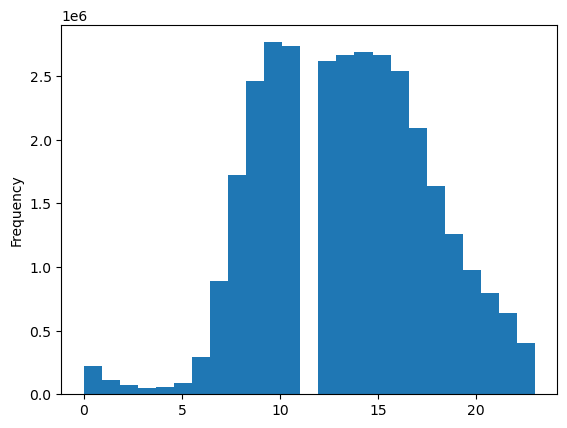

In [25]:
#3.
#Histogram order_hour_of_day
hist_order_hour_of_day = df_orders_products['order_hour_of_day'].plot.hist(bins = 25)

Customers' peak shopping time is from 9:00am to 5:00pm with a drop off during 12:00pm

<Axes: ylabel='Frequency'>

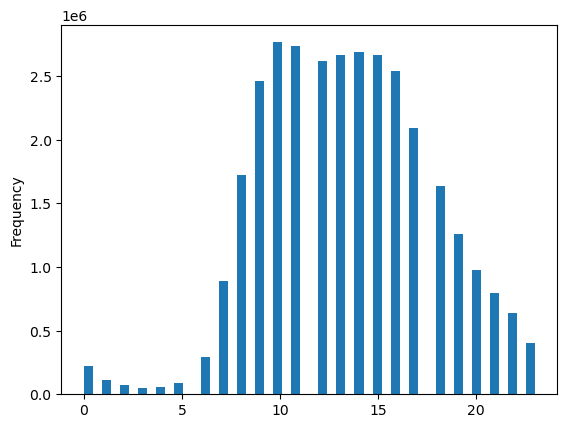

In [26]:
df_orders_products['order_hour_of_day'].plot.hist(bins = 50)

An additional histogram with 50 bins instead of 25 still shows 12:00pm having low customer activity

## Bar Chart

In [27]:
#4.
#Creating bar chart for loyalty flag differing each value with different colors
bar_loyalty_bar = df_orders_products['loyalty_flag'].value_counts().plot.bar(color = ['red', 'green', 'blue'])

## Line Chart

In [28]:
#5.
#Dataframe for only columns needed for line chart
df_3 = small[['order_hour_of_day','prices']]

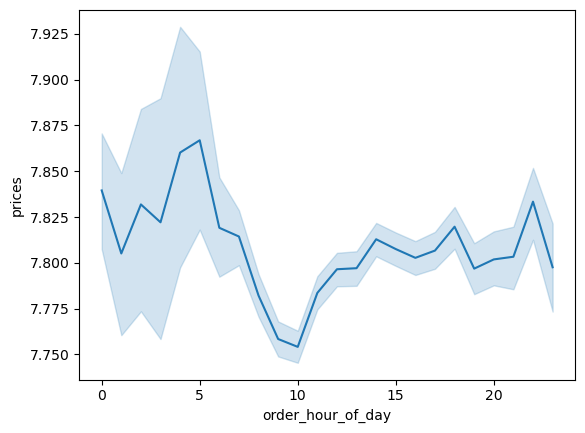

In [29]:
#Generating line chart
line_hour_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [31]:
#6.
dev = np.random.rand(len(df_user_stats_customers)) <= 0.7

In [35]:
small_2 = df_user_stats_customers[~dev]

In [37]:
#Datafrane for neccesary data
df_4 = small_2[['Age','num_dependants']]

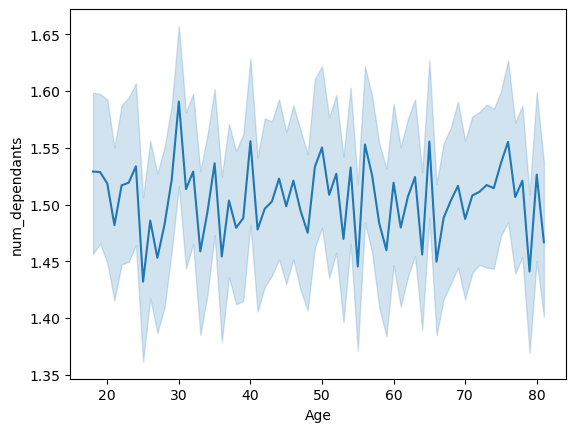

In [38]:
line_age_dependants = sns.lineplot(data = df_4, x = 'Age',y = 'num_dependants')

There is no strong correlation between age or number of dependents.

In [43]:
#7.
#Dataframe for scatterplot
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_user_stats_customers)

There is a positive correlation between age and income.

In [44]:
#8.
#Exporting visualizations
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [45]:
bar_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_bar.png'))

In [46]:
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [47]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [48]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))